In [1]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv('C:\\Users\\admin\\Downloads\\glass.csv')

In [3]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
df.shape

(214, 10)

In [7]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

<AxesSubplot:>

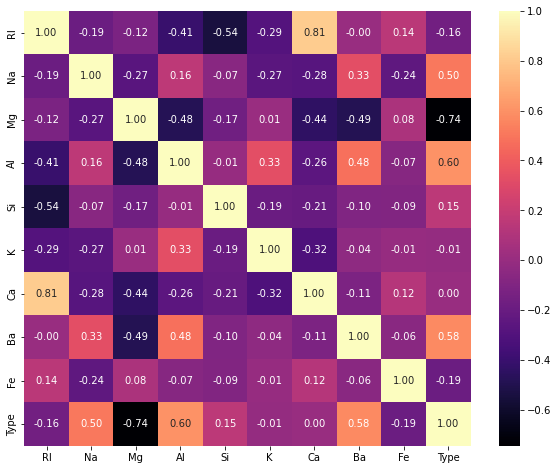

In [8]:
plt.figure(figsize = (10, 8));
sns.heatmap(df.corr(), cmap='magma', annot=True, fmt=".2f")

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RI', ylabel='Mg'>

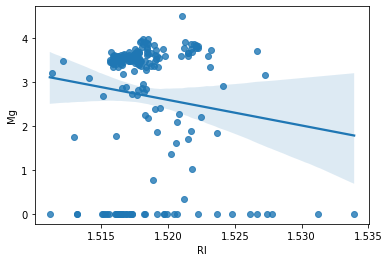

In [9]:
sns.regplot('RI','Mg', data=df)  

<AxesSubplot:>

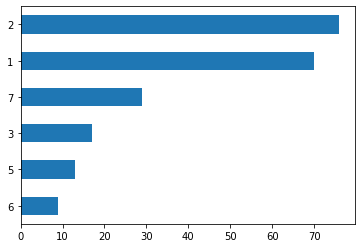

In [10]:
df.Type.value_counts(ascending=True).plot(kind='barh')

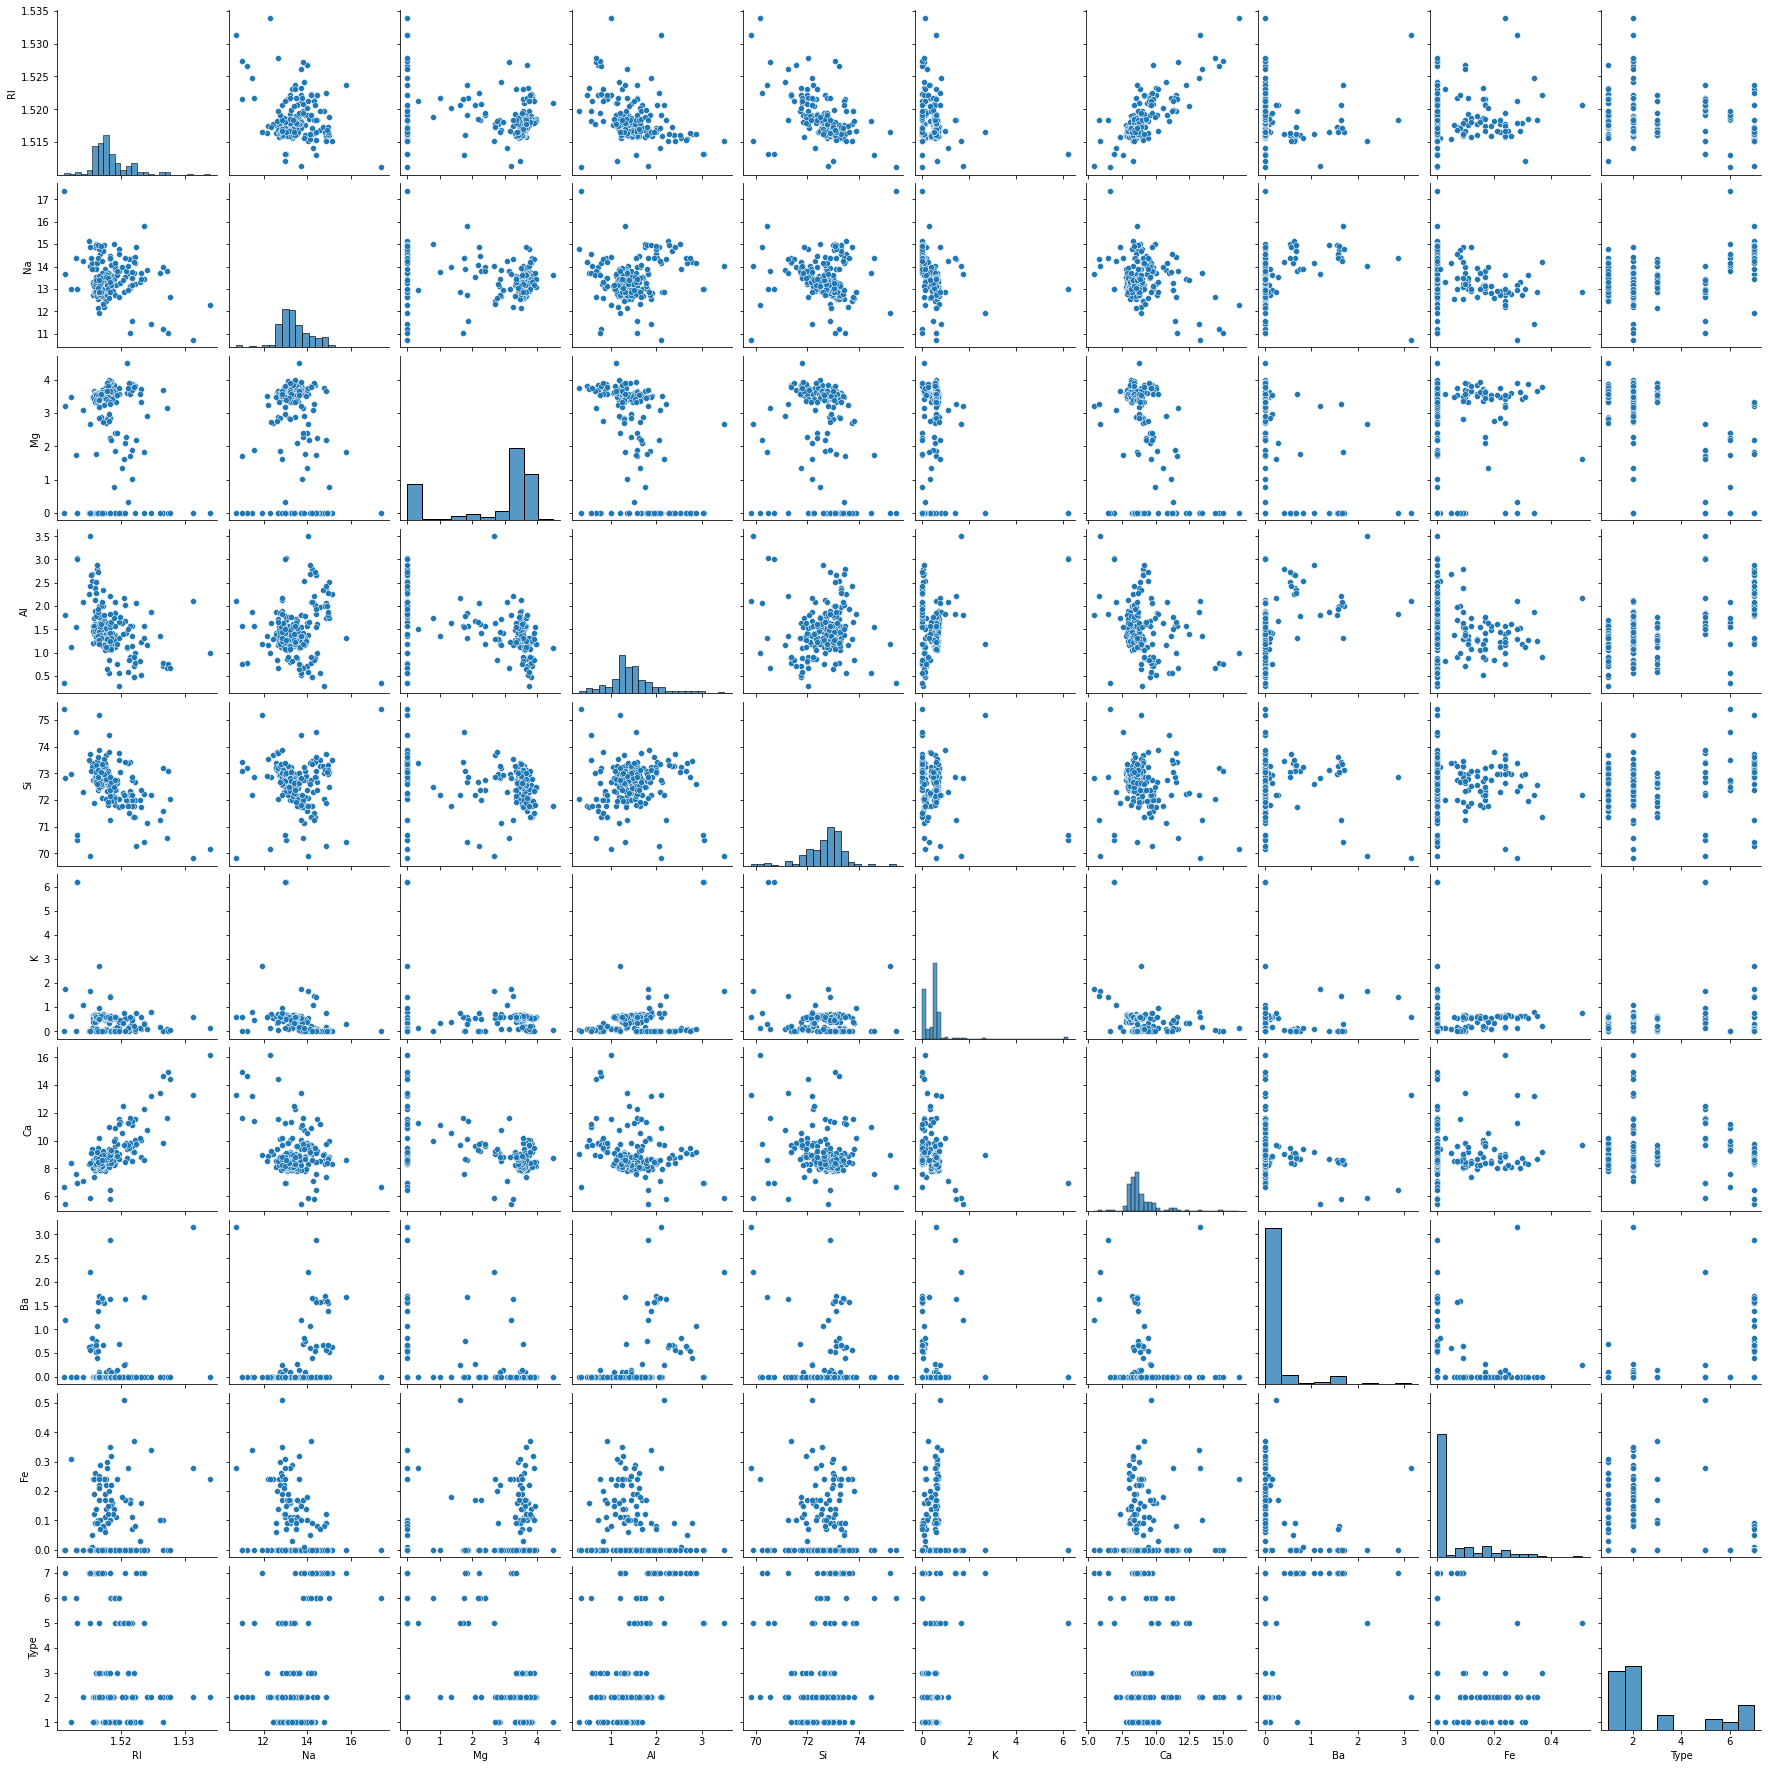

In [11]:
sns.pairplot(df)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Type', ylabel='Density'>

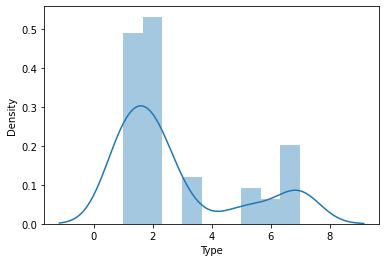

In [12]:
sns.distplot(df['Type'])

<AxesSubplot:xlabel='Na', ylabel='Al'>

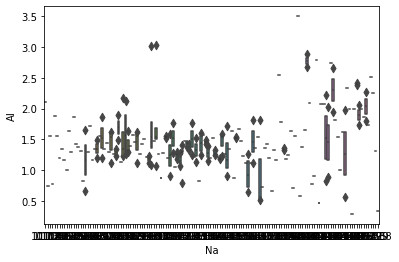

In [13]:
sns.boxenplot(x = 'Na', y = 'Al', data = df)

<AxesSubplot:xlabel='Type', ylabel='RI'>

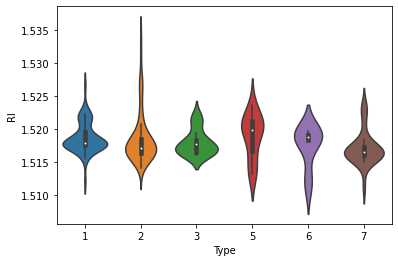

In [14]:
sns.violinplot(x ="Type",
             y ="RI",
             style ="event",
             data = df)

In [15]:
X = df.iloc[:, 0:9]
Y = df.iloc[:, -1]


In [16]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [17]:
model = KNeighborsClassifier(n_neighbors = 10)

In [18]:
model.fit(X,Y)

KNeighborsClassifier(n_neighbors=10)

In [19]:
kfold = KFold(n_splits=8)
Result = cross_val_score(model, X, Y, cv = kfold)
Result

array([0.55555556, 0.7037037 , 0.88888889, 0.40740741, 0.40740741,
       0.22222222, 0.        , 0.        ])

In [20]:
Result.mean()

0.39814814814814814

In [21]:
model.predict([[1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0]])

array([7], dtype=int64)

# Grid Search 

In [22]:
n_neighbors = list(range(1,45))
parameters = {'n_neighbors' : n_neighbors}

In [23]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator = model, param_grid = parameters)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [24]:
print(grid.best_score_)
print(grid.best_params_)

0.640531561461794
{'n_neighbors': 1}


In [25]:
k_range = range(1, 57)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, Y, cv=4)
    k_scores.append(scores.mean())

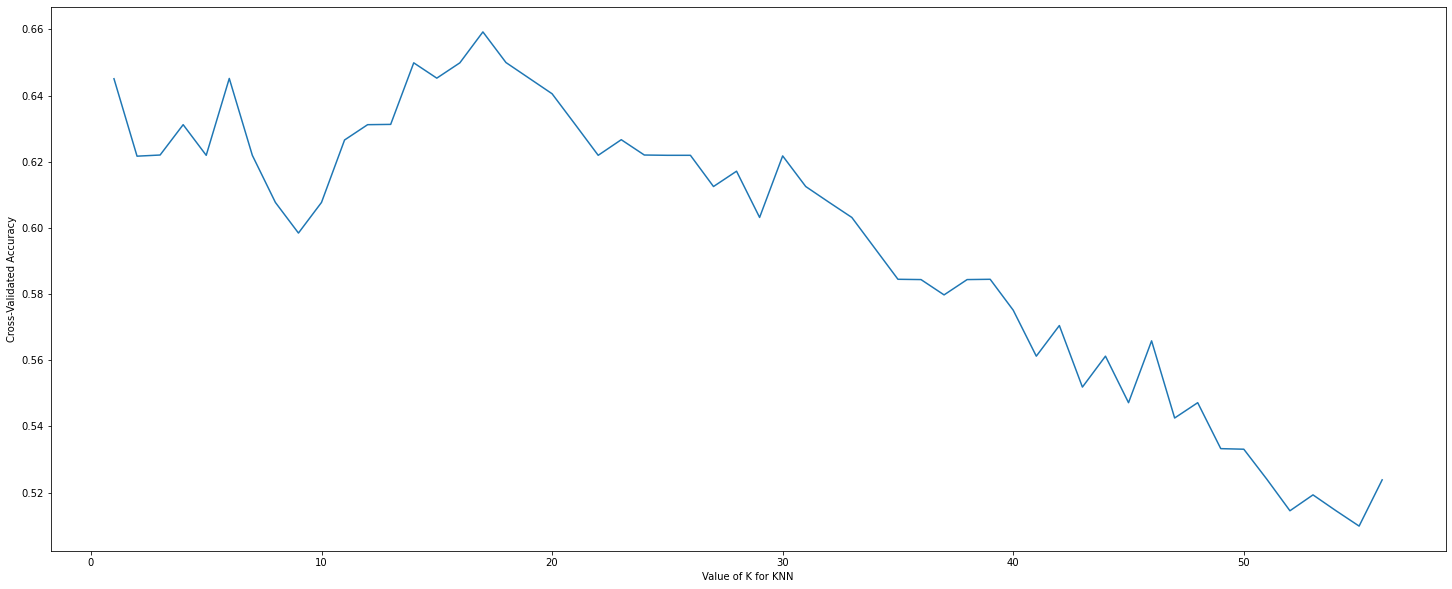

In [26]:
plt.figure(figsize=(25,10))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [27]:
k_scores

[0.6450908455625437,
 0.621680642907058,
 0.6220300489168414,
 0.6312019566736548,
 0.6219426974143956,
 0.6451781970649895,
 0.6219426974143956,
 0.6077044025157233,
 0.598445143256464,
 0.6077044025157233,
 0.6265723270440252,
 0.6312019566736548,
 0.6312893081761006,
 0.649895178197065,
 0.6452655485674353,
 0.649895178197065,
 0.6592417889587701,
 0.6499825296995109,
 0.6452655485674353,
 0.6405485674353598,
 0.6312893081761005,
 0.6219426974143956,
 0.626659678546471,
 0.6220300489168414,
 0.6219426974143955,
 0.6219426974143955,
 0.6125087351502445,
 0.6171383647798742,
 0.6031621243885396,
 0.6217679944095038,
 0.6125087351502446,
 0.6077917540181691,
 0.6031621243885394,
 0.5938155136268344,
 0.5844689028651292,
 0.5843815513626834,
 0.5797519217330538,
 0.5843815513626834,
 0.5844689028651292,
 0.5751222921034241,
 0.5612334032145353,
 0.5704926624737945,
 0.5518867924528302,
 0.5612334032145353,
 0.5471698113207547,
 0.565863032844165,
 0.5425401816911251,
 0.5471698113207547

In [28]:
glass_accuracy = pd.DataFrame({'Value of k' : range(1,57),
                            'Accuracy' : k_scores})
glass_accuracy

,Value of k,Accuracy
0,1,0.645091
1,2,0.621681
2,3,0.622030
3,4,0.631202
4,5,0.621943
5,6,0.645178
6,7,0.621943
7,8,0.607704
8,9,0.598445
9,10,0.607704
